In [1]:
aname='/content/drive/MyDrive/ColabNotebooks/KPMG Virtual Internship/EDA/datasets/CustomerAddress.csv'
cname='/content/drive/MyDrive/ColabNotebooks/KPMG Virtual Internship/EDA/datasets/CustomerDemographic.csv'
tname='/content/drive/MyDrive/ColabNotebooks/KPMG Virtual Internship/EDA/datasets/Transactions.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams["figure.figsize"]=(20,10)
%matplotlib inline

In [4]:
t=pd.read_csv(tname)
a=pd.read_csv(aname)
c=pd.read_csv(cname)

In [5]:
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [6]:
c.head()

,customer_id,first_name,last_name,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,sex,age
0,1,Laraine,Medendorp,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,F,63.0
1,2,Eli,Bockman,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,M,36.0
2,3,Arlin,Dearle,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,M,62.0
3,4,Talbot,NaN,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,M,55.0
4,5,Sheila-kathryn,Calton,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,F,39.0


In [7]:
a.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
df=t.merge(c,how="left",on='customer_id').merge(a,how="left",on='customer_id')

In [9]:
df.shape

(20000, 31)

In [10]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,sex,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,M,61.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,F,37.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,N,No,22.0,M,39.0,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,N,No,16.0,M,54.0,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,2.0,F,20.0,0601 Stephen Place,2292.0,NSW,Australia,7.0


In [12]:
df.isna().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            360
order_status                              0
brand                                   197
product_line                            197
product_class                           197
product_size                            197
list_price                                0
standard_cost                           197
product_first_sold_date                 197
profit                                  197
first_name                                3
last_name                               645
past_3_years_bike_related_purchases       3
DOB                                     464
job_title                              2397
job_industry_category                  3232
wealth_segment                            3
deceased_indicator                        3
owns_car                        

#EDA 1

#correlation matrix and scatterplot

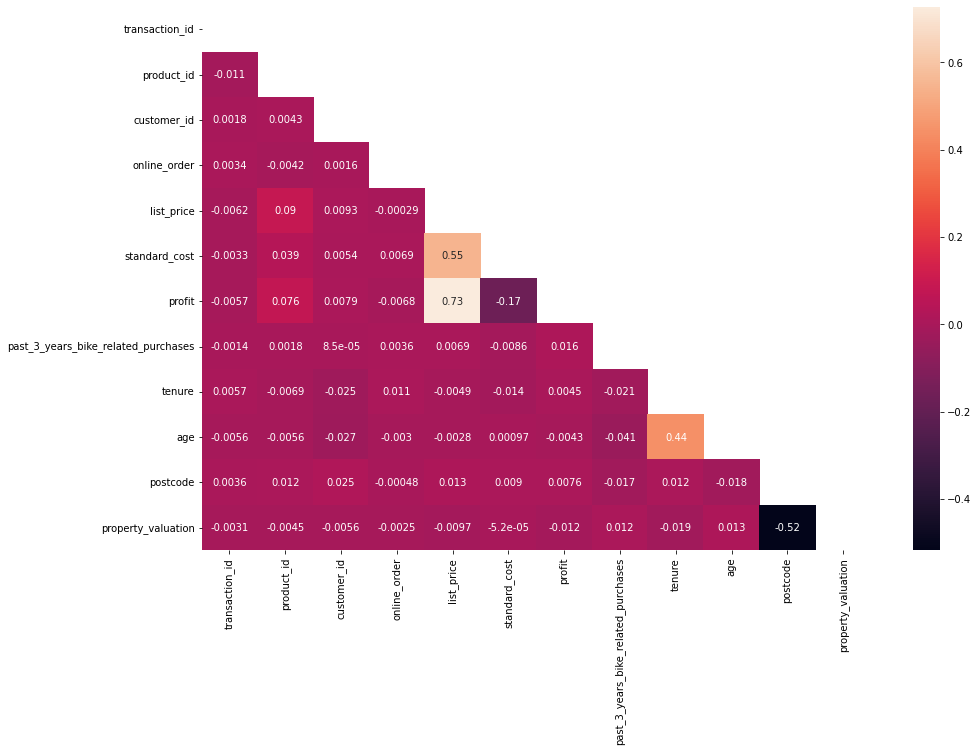

In [13]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask,annot=True)

there is not much significance between list price and other continous variables

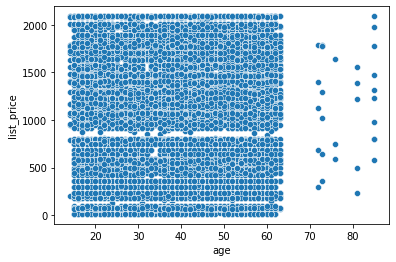

In [14]:
sns.scatterplot(x='age',y='list_price',data=df)

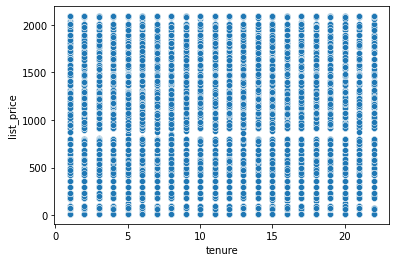

In [15]:
sns.scatterplot(x='tenure',y='list_price',data=df)

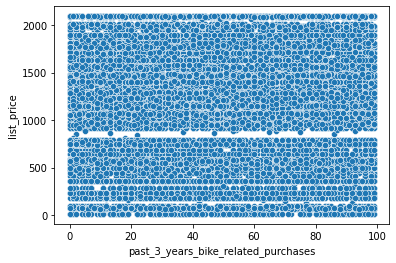

In [16]:
sns.scatterplot(x='past_3_years_bike_related_purchases',y='list_price',data=df)

#using groupby

In [17]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'sex', 'age', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [18]:
str_cols=df.select_dtypes('object').columns

In [19]:
str_cols

Index(['transaction_date', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'product_first_sold_date',
       'first_name', 'last_name', 'DOB', 'job_title', 'job_industry_category',
       'wealth_segment', 'deceased_indicator', 'owns_car', 'sex', 'address',
       'state', 'country'],
      dtype='object')

In [20]:
cols=str_cols[[11,12,14,15,17]]
cols

Index(['job_industry_category', 'wealth_segment', 'owns_car', 'sex', 'state'], dtype='object')

In [21]:
for i in cols:
  print(f'for column {i}')
  print(df.groupby(i)['list_price'].describe().sort_values('mean',ascending=False))
  print('*'*80)

for column job_industry_category
                        count         mean         std    min       25%  \
job_industry_category                                                     
Retail                 1758.0  1126.935910  588.142728  12.01  575.2700   
IT                     1084.0  1125.502740  585.633090  12.01  586.4500   
Entertainment           698.0  1123.621261  566.064690  12.01  642.4075   
Financial Services     3886.0  1114.263744  588.348935  12.01  575.2700   
Property               1297.0  1107.357340  577.565410  12.01  590.2600   
Manufacturing          4014.0  1105.476697  579.960888  12.01  586.4500   
Health                 3099.0  1103.346802  590.228002  12.01  574.6400   
Argiculture             578.0  1068.086453  565.221340  12.01  574.7975   
Telecommunications      354.0  1059.988701  572.750368  12.01  569.5600   

                           50%      75%      max  
job_industry_category                             
Retail                 1198.46  1636.90

In [22]:
for i in cols:
  print(f'for column {i}')
  print(df.groupby(i)['profit'].describe().sort_values('mean',ascending=False))
  print('*'*80)

for column job_industry_category
                        count        mean         std  min      25%      50%  \
job_industry_category                                                          
IT                     1068.0  567.919869  513.142862  4.8  135.850  445.210   
Retail                 1746.0  562.434914  497.114547  4.8  135.850  448.680   
Financial Services     3841.0  560.680859  497.954197  4.8  133.780  448.680   
Entertainment           694.0  556.353674  486.892793  4.8  139.230  445.210   
Property               1286.0  547.046703  484.639529  4.8  135.850  445.210   
Manufacturing          3976.0  545.200744  488.635140  4.8  133.780  445.210   
Health                 3073.0  542.676710  495.005444  4.8  133.380  431.330   
Argiculture             566.0  535.320406  474.110701  4.8  136.695  437.460   
Telecommunications      352.0  532.386392  489.376784  4.8  135.850  434.395   

                          75%      max  
job_industry_category                   
IT  

#no of transactions and bike related transactions

In [23]:
f1=df.groupby('customer_id').agg({'customer_id':'count','past_3_years_bike_related_purchases':'mean'})

In [24]:
f1

,customer_id,past_3_years_bike_related_purchases
customer_id,,
1,11,93.0
2,3,81.0
3,8,61.0
4,2,33.0
5,6,56.0
...,...,...
3497,3,73.0
3498,6,28.0
3499,7,29.0


In [25]:
f1.corr()

,customer_id,past_3_years_bike_related_purchases
customer_id,1.000000,-0.002928
past_3_years_bike_related_purchases,-0.002928,1.000000


no significant correlation

#histogram

In [26]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'sex', 'age', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

#list price

In [28]:
cols=['job_industry_category', 'wealth_segment','owns_car','sex','state']

for column ONLINE_ORDER


<Figure size 432x288 with 0 Axes>

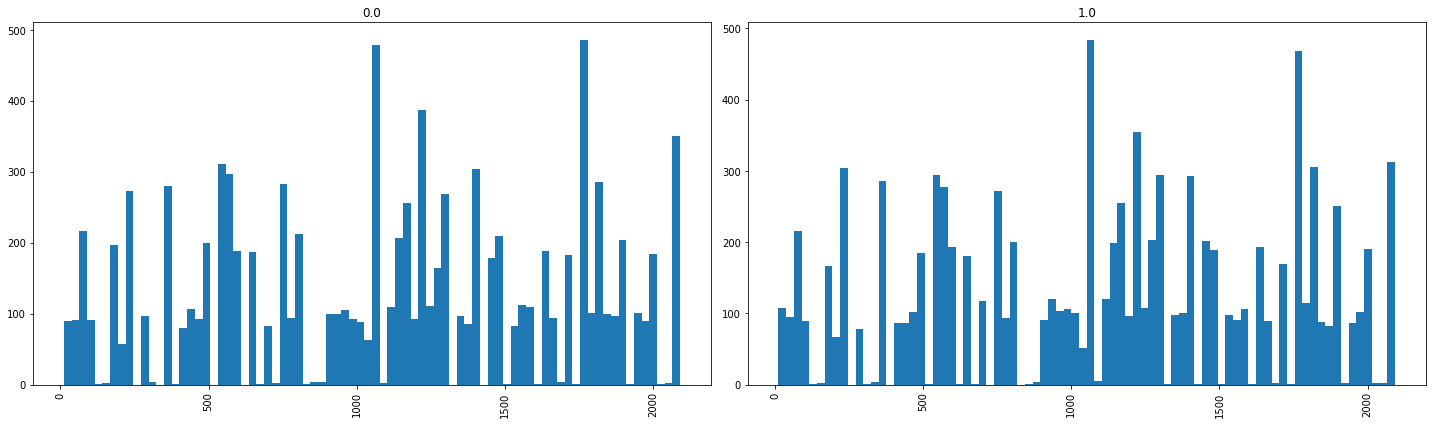

************************************************************************************************************************************************************************************
for column BRAND


<Figure size 432x288 with 0 Axes>

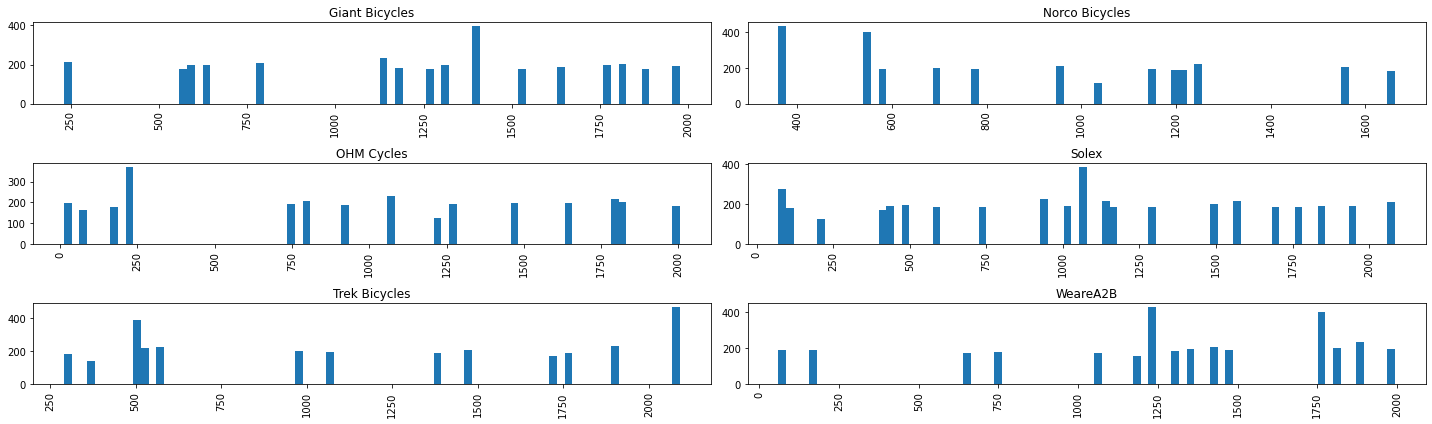

************************************************************************************************************************************************************************************
for column PRODUCT_LINE


<Figure size 432x288 with 0 Axes>

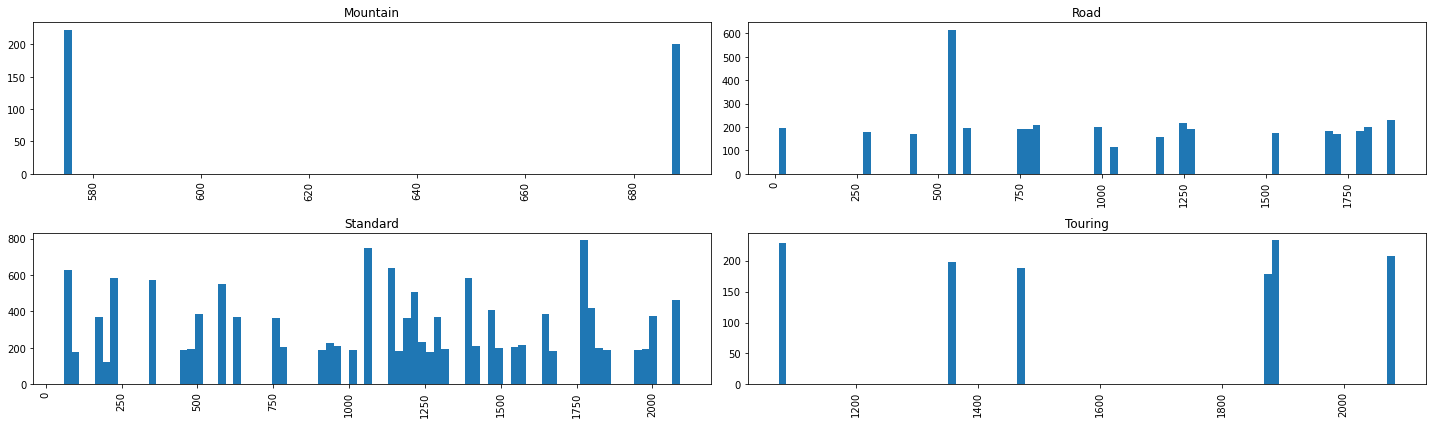

************************************************************************************************************************************************************************************
for column PRODUCT_CLASS


<Figure size 432x288 with 0 Axes>

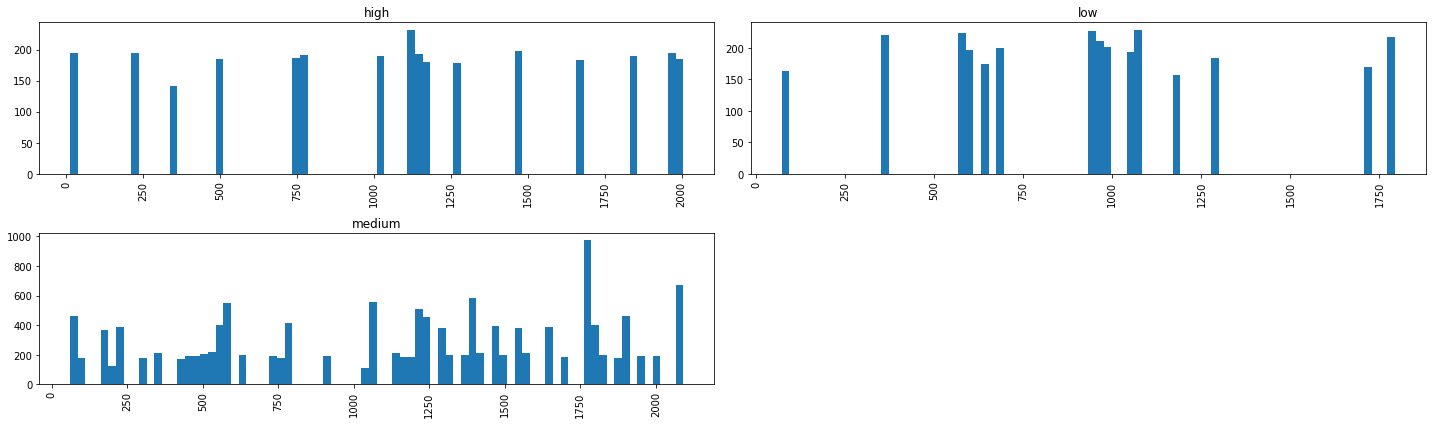

************************************************************************************************************************************************************************************
for column PRODUCT_SIZE


<Figure size 432x288 with 0 Axes>

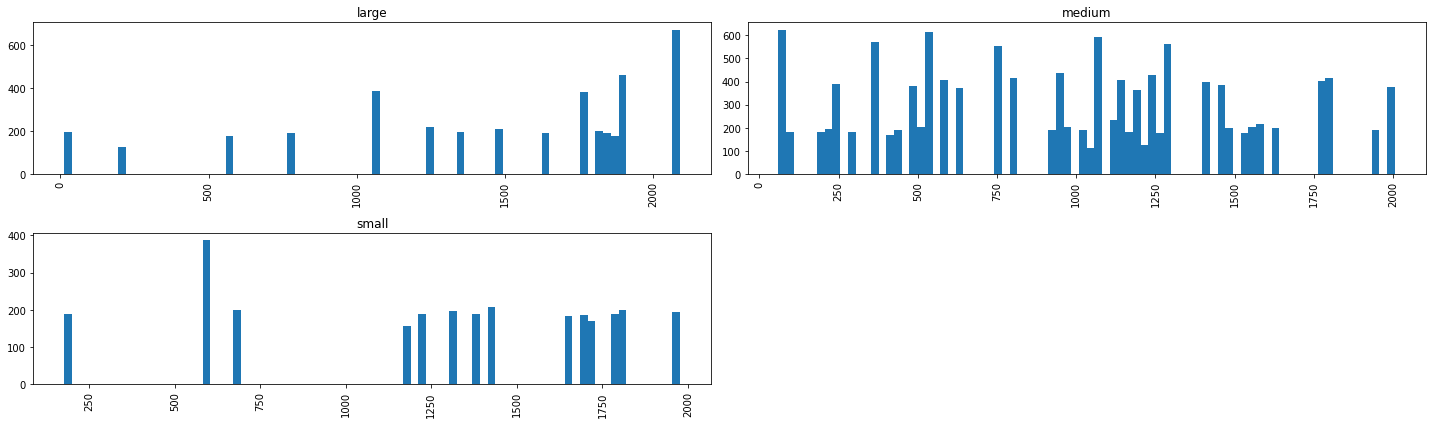

************************************************************************************************************************************************************************************


In [37]:
j=0
for i in cols:
  plt.figure(j)
  print(f'for column {i.upper()}')
  df.hist(column='list_price',by=i,figsize=(20,6),bins=80)
  plt.tight_layout()
  plt.show()
  print('*'*180)
  j+=1


#Profit

for column ONLINE_ORDER


<Figure size 432x288 with 0 Axes>

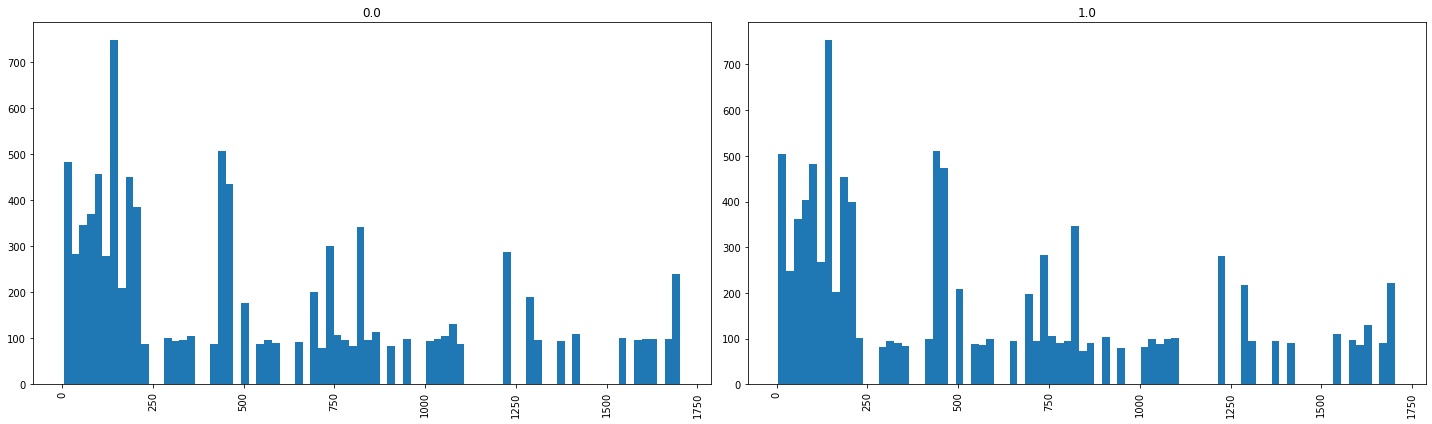

************************************************************************************************************************************************************************************
for column BRAND


<Figure size 432x288 with 0 Axes>

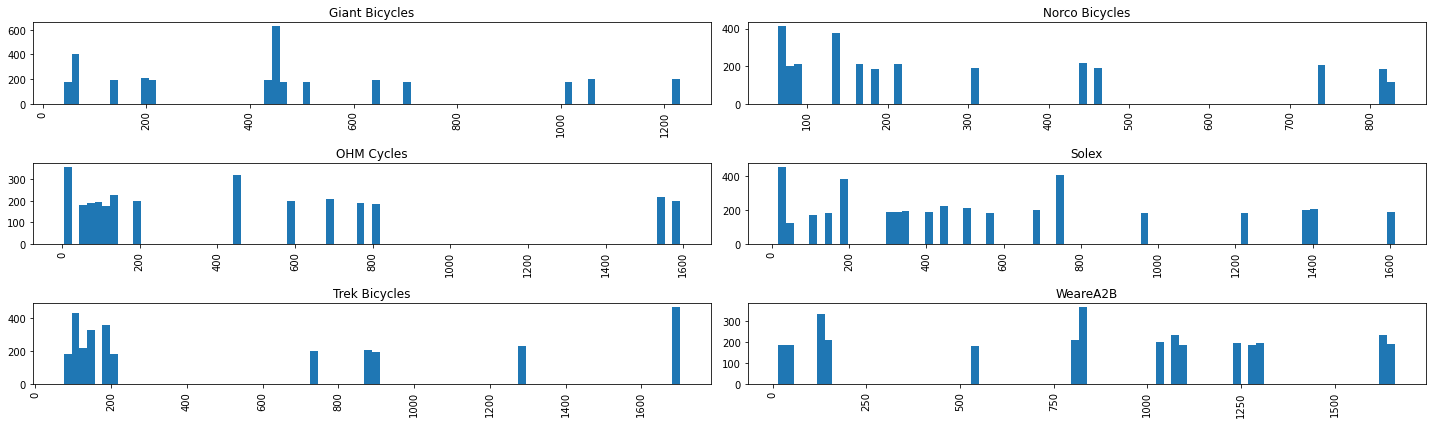

************************************************************************************************************************************************************************************
for column PRODUCT_LINE


<Figure size 432x288 with 0 Axes>

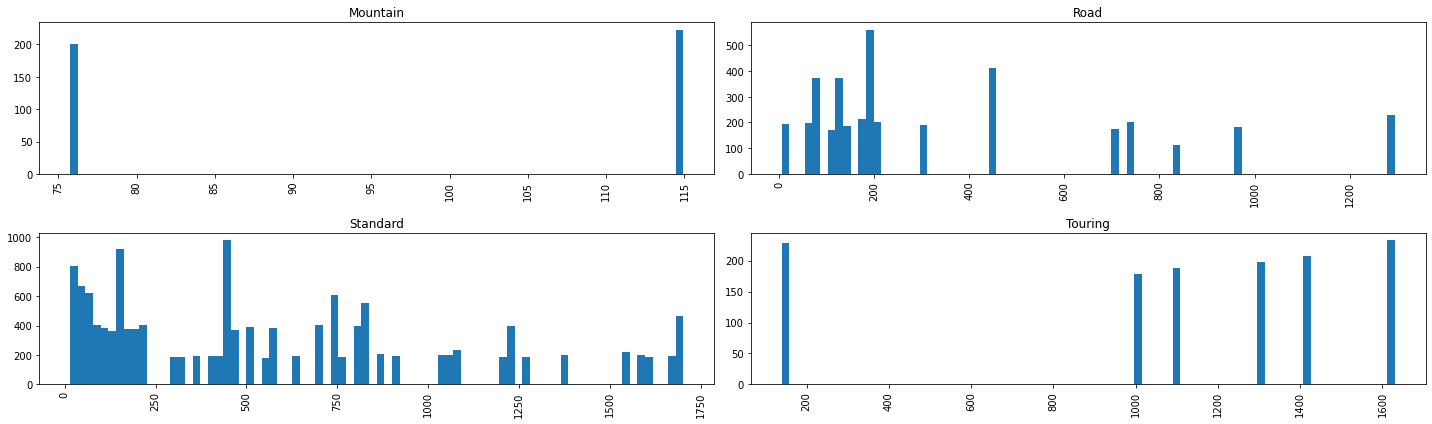

************************************************************************************************************************************************************************************
for column PRODUCT_CLASS


<Figure size 432x288 with 0 Axes>

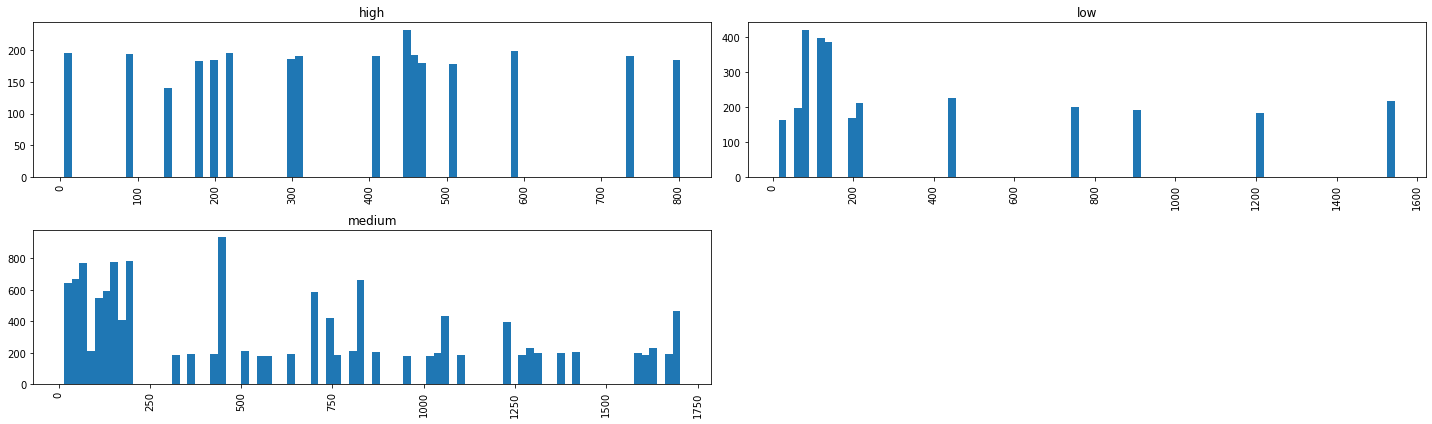

************************************************************************************************************************************************************************************
for column PRODUCT_SIZE


<Figure size 432x288 with 0 Axes>

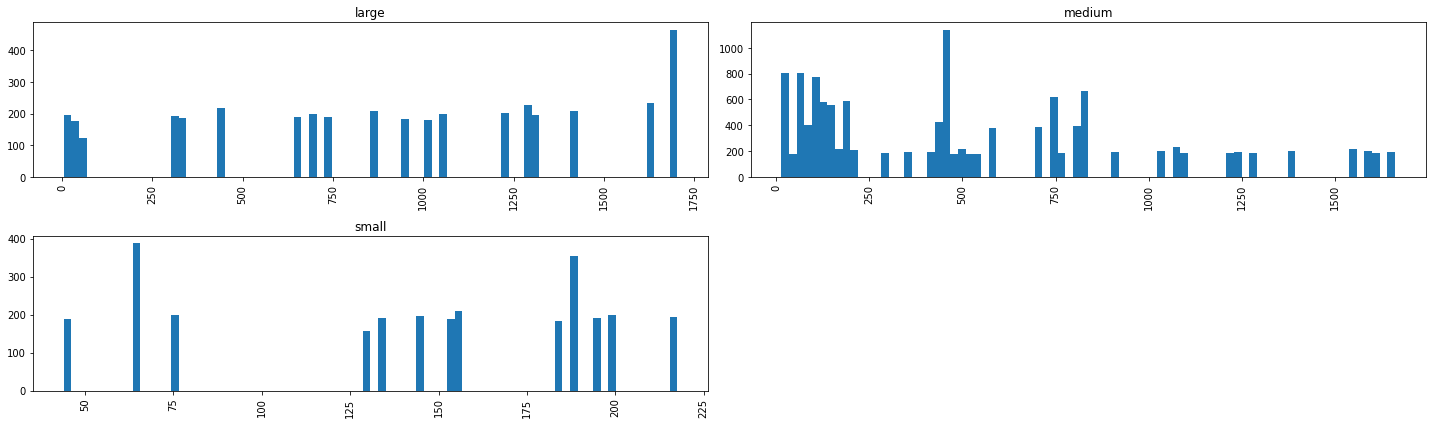

************************************************************************************************************************************************************************************


In [38]:
j=0
for i in cols:
  plt.figure(j)
  print(f'for column {i.upper()}')
  df.hist(column='profit',by=i,figsize=(20,6),bins=80)
  plt.tight_layout()
  plt.show()
  print('*'*180)
  j+=1


#doing the same for product attributes

In [34]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'sex', 'age', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [35]:
cols=['online_order','brand', 'product_line','product_class', 'product_size']

In [36]:
for i in cols:
  print(f'for column {i}')
  print(df.groupby(i)['list_price'].describe().sort_values('mean',ascending=False))
  print('*'*80)

for column online_order
               count         mean         std    min     25%      50%  \
online_order                                                            
0.0           9811.0  1107.288975  583.496759  12.01  575.27  1163.89   
1.0           9829.0  1106.945606  581.978549  12.01  586.45  1163.89   

                  75%      max  
online_order                    
0.0           1635.30  2091.47  
1.0           1615.62  2091.47  
********************************************************************************
for column brand
                 count         mean         std     min      25%      50%  \
brand                                                                       
WeareA2B        3295.0  1263.454813  547.359147   60.34  1065.03  1292.84   
Giant Bicycles  3312.0  1235.407204  506.379596  230.91   792.90  1311.44   
Trek Bicycles   2990.0  1183.783398  645.628711  290.62   533.51  1057.51   
Solex           4253.0  1057.271956  605.322917   71.49   478.16  10

In [39]:
for i in cols:
  print(f'for column {i}')
  print(df.groupby(i)['profit'].describe().sort_values('mean',ascending=False))
  print('*'*80)

for column online_order
               count        mean         std  min     25%     50%     75%  \
online_order                                                                
0.0           9706.0  555.110205  493.832065  4.8  135.85  445.21  830.24   
1.0           9739.0  548.405041  492.595520  4.8  133.78  445.21  827.16   

                  max  
online_order           
0.0           1702.55  
1.0           1702.55  
********************************************************************************
for column brand
                 count        mean         std    min     25%     50%  \
brand                                                                   
WeareA2B        3295.0  835.780021  534.842544  15.08  155.65  834.94   
Trek Bicycles   2990.0  614.707090  597.350517  75.48  133.38  195.34   
Solex           4253.0  567.564450  470.910427  17.87  179.44  437.46   
OHM Cycles      3043.0  487.360776  505.815201   4.80   91.15  199.10   
Giant Bicycles  3312.0  475.193351 

for column ONLINE_ORDER


<Figure size 432x288 with 0 Axes>

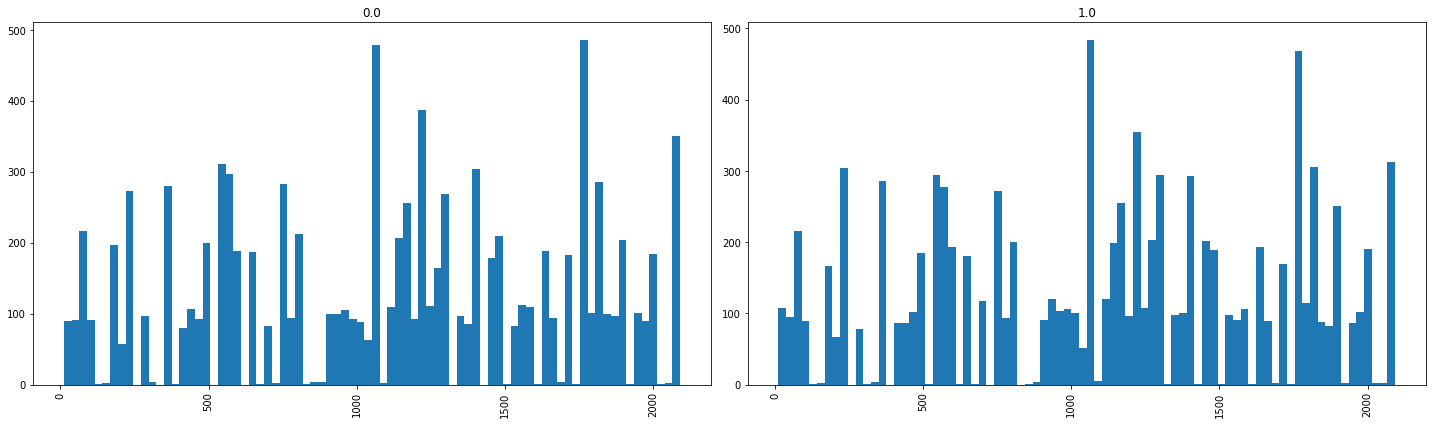

************************************************************************************************************************************************************************************
for column BRAND


<Figure size 432x288 with 0 Axes>

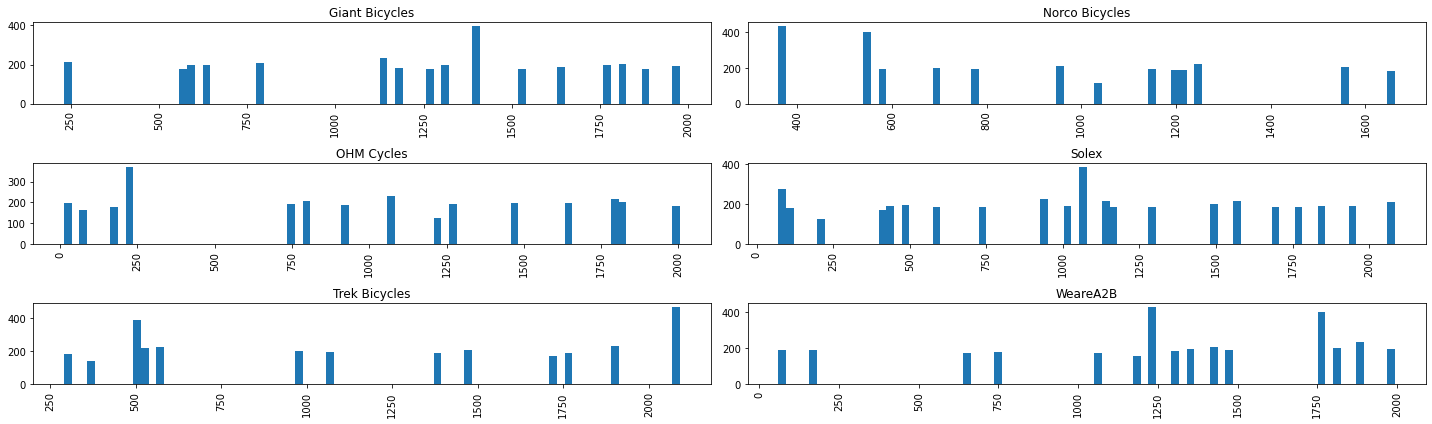

************************************************************************************************************************************************************************************
for column PRODUCT_LINE


<Figure size 432x288 with 0 Axes>

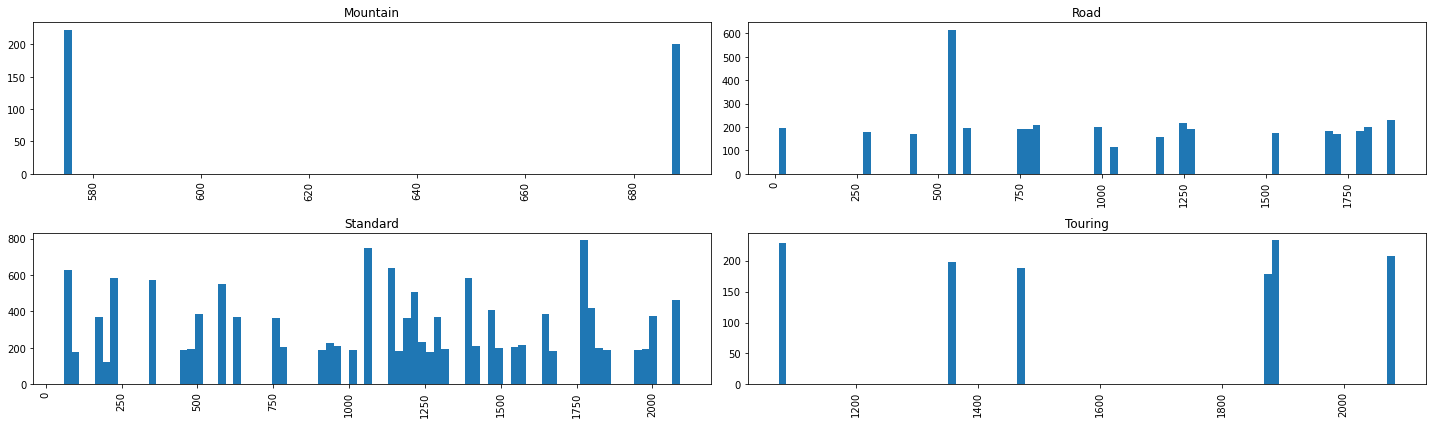

************************************************************************************************************************************************************************************
for column PRODUCT_CLASS


<Figure size 432x288 with 0 Axes>

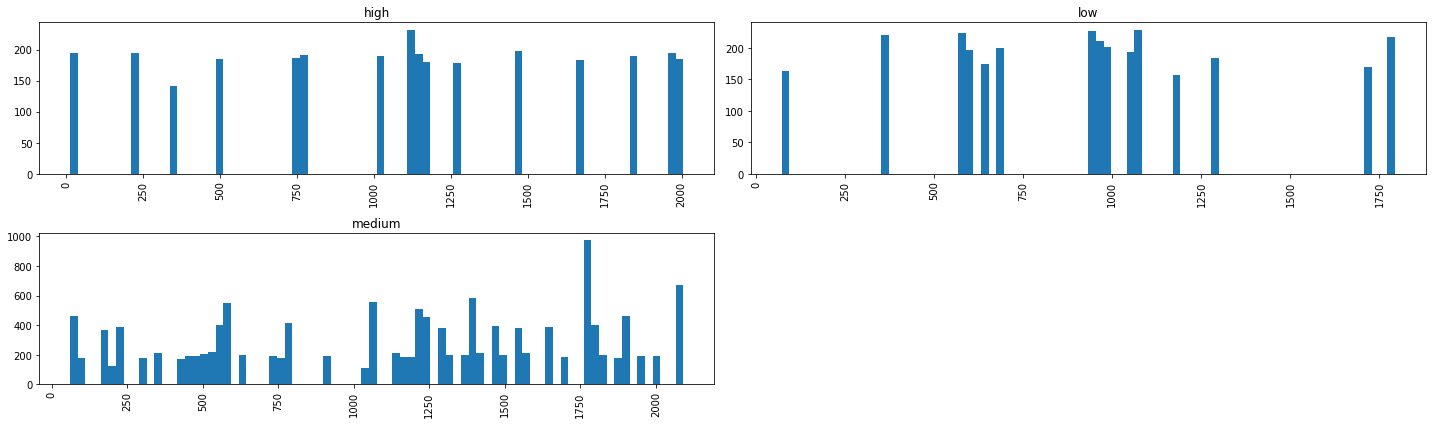

************************************************************************************************************************************************************************************
for column PRODUCT_SIZE


<Figure size 432x288 with 0 Axes>

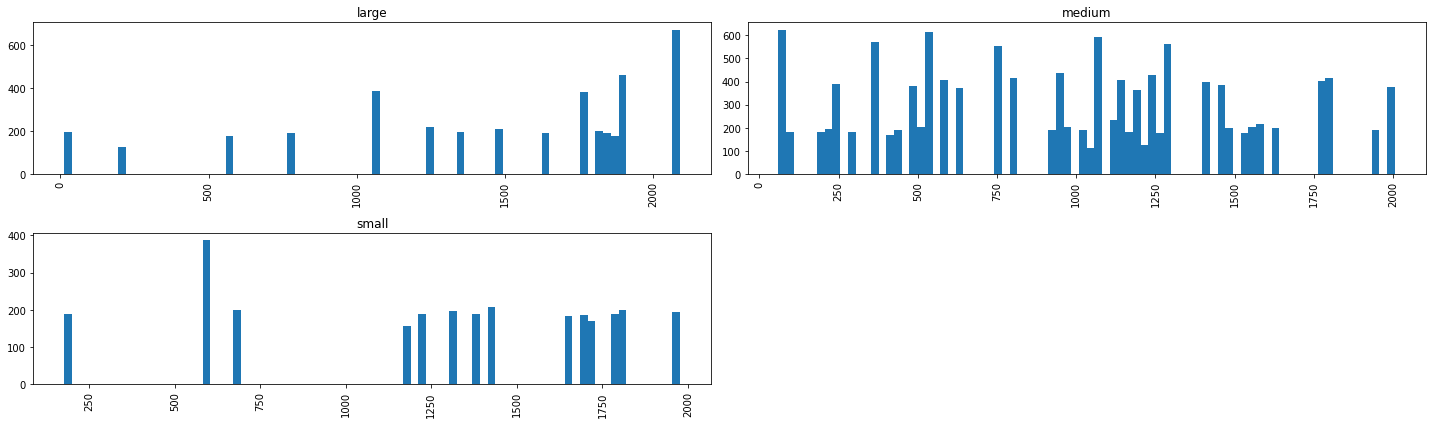

************************************************************************************************************************************************************************************


In [40]:
j=0
for i in cols:
  plt.figure(j)
  print(f'for column {i.upper()}')
  df.hist(column='list_price',by=i,figsize=(20,6),bins=80)
  plt.tight_layout()
  plt.show()
  print('*'*180)
  j+=1


for column ONLINE_ORDER


<Figure size 432x288 with 0 Axes>

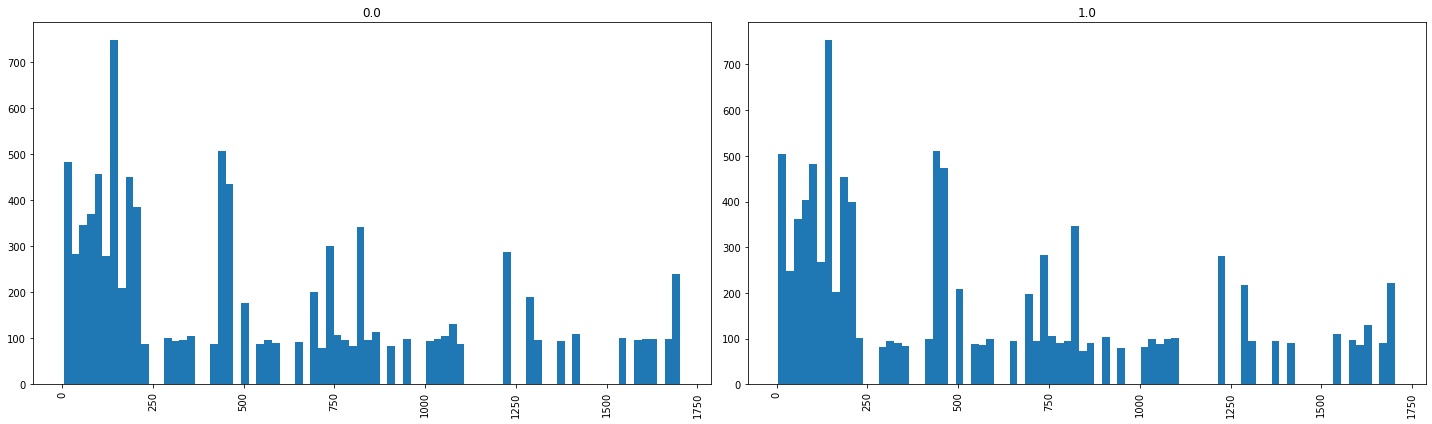

************************************************************************************************************************************************************************************
for column BRAND


<Figure size 432x288 with 0 Axes>

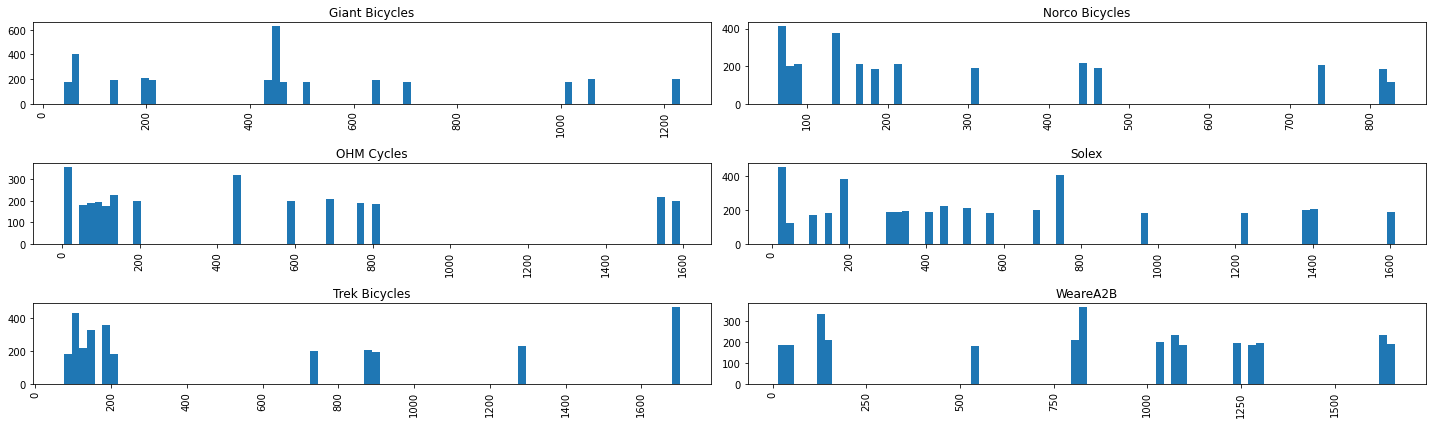

************************************************************************************************************************************************************************************
for column PRODUCT_LINE


<Figure size 432x288 with 0 Axes>

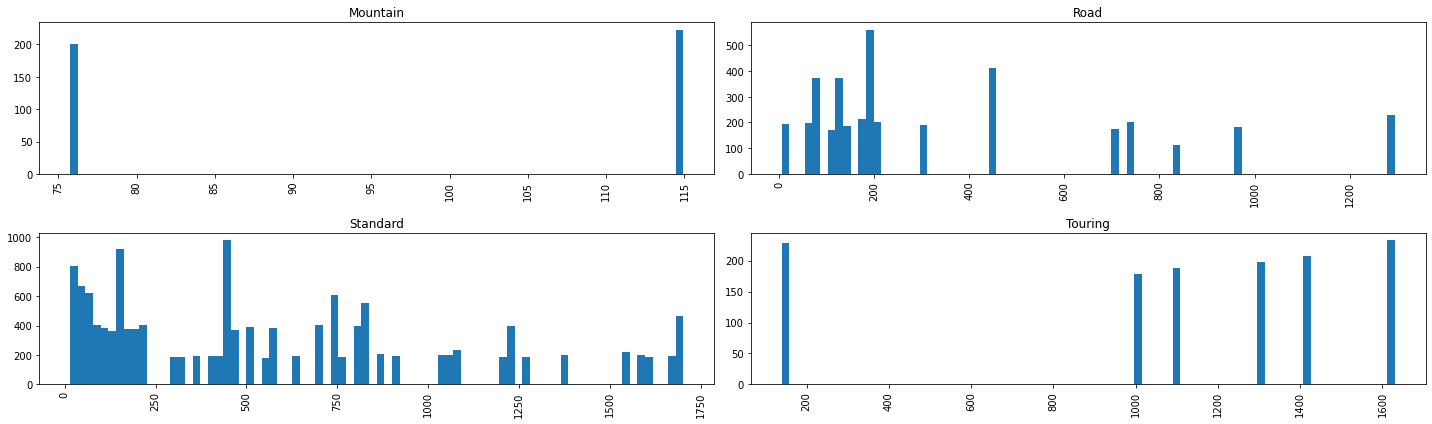

************************************************************************************************************************************************************************************
for column PRODUCT_CLASS


<Figure size 432x288 with 0 Axes>

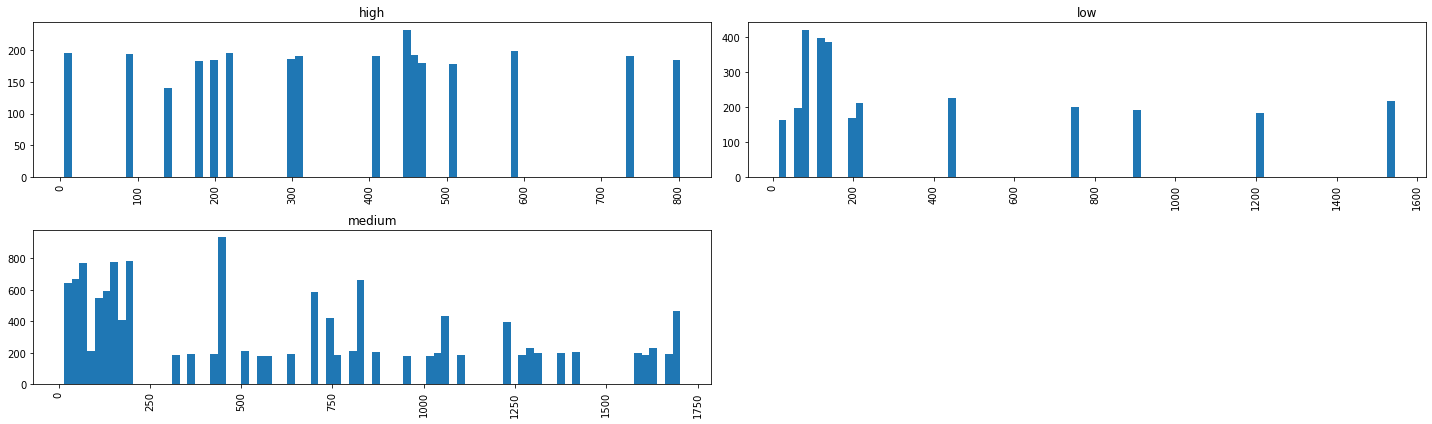

************************************************************************************************************************************************************************************
for column PRODUCT_SIZE


<Figure size 432x288 with 0 Axes>

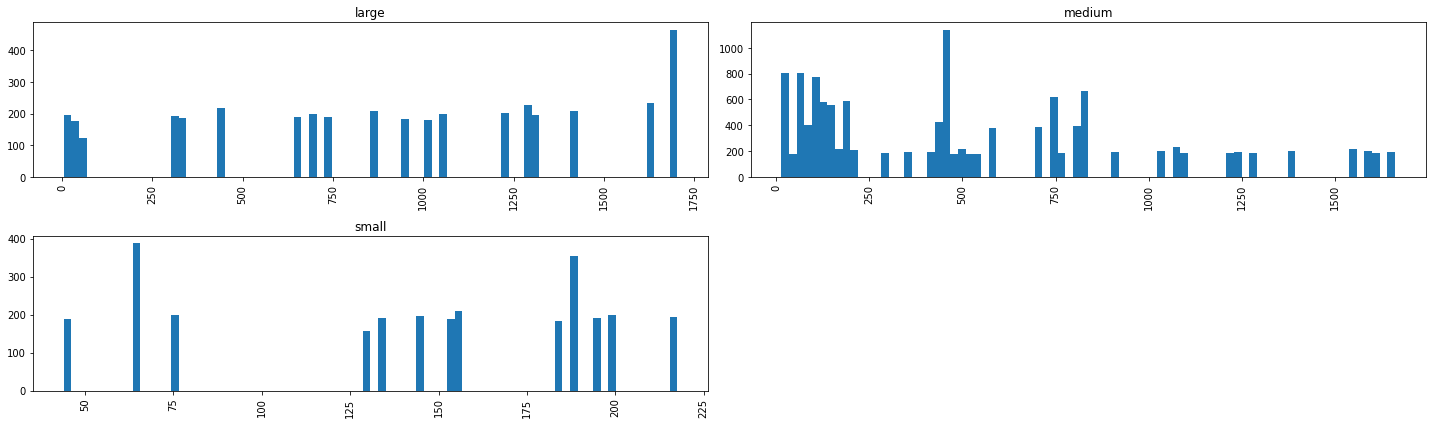

************************************************************************************************************************************************************************************


In [41]:
j=0
for i in cols:
  plt.figure(j)
  print(f'for column {i.upper()}')
  df.hist(column='profit',by=i,figsize=(20,6),bins=80)
  plt.tight_layout()
  plt.show()
  print('*'*180)
  j+=1


#recommendation

In [42]:
address='/content/drive/MyDrive/ColabNotebooks/KPMG Virtual Internship/data quality/kpmgdata.xlsx'

In [43]:
new=pd.read_excel(address,sheet_name='NewCustomerList',header=1)

In [44]:
new.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20'],axis=1,inplace=True)

In [45]:
new.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


affluent customer 
VIC,QLD
U,F
owns car
 

In [46]:
new.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [50]:
new.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

In [53]:
new.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [51]:
new[(new.wealth_segment=='Affluent Customer')&(new.state=='QLD')&(new.owns_car=='Yes')&(new.gender=='Female')]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
35,Arleen,Casbolt,Female,48,1975-05-10,Senior Quality Engineer,Financial Services,Affluent Customer,N,Yes,13,41042 Lotheville Crossing,4817,QLD,Australia,1,36,1.447656
46,Sheena,Kybbye,Female,14,1956-07-16,Paralegal,Financial Services,Affluent Customer,N,Yes,19,306 Clemons Junction,4852,QLD,Australia,1,46,1.407812
66,Rosmunda,Duxbarry,Female,69,1996-07-20,Executive Secretary,Property,Affluent Customer,N,Yes,5,989 Graedel Terrace,4208,QLD,Australia,11,65,1.362500
67,Rozamond,Riha,Female,54,1984-10-07,Account Representative I,Manufacturing,Affluent Customer,N,Yes,16,76 Bartelt Center,4078,QLD,Australia,7,68,1.354688
150,Daisy,Spowart,Female,60,1967-12-18,Staff Accountant I,Health,Affluent Customer,N,Yes,4,115 Westridge Road,4570,QLD,Australia,3,146,1.225000
217,Cami,Barnbrook,Female,8,1963-01-01,Occupational Therapist,Health,Affluent Customer,N,Yes,18,890 Truax Lane,4285,QLD,Australia,2,218,1.126250
229,Abigale,Sives,Female,48,1963-12-13,VP Marketing,Health,Affluent Customer,N,Yes,14,2 Glendale Center,4207,QLD,Australia,4,230,1.109375
340,Nicole,Ruckhard,Female,93,1969-10-09,Human Resources Manager,Health,Affluent Customer,N,Yes,17,23694 Leroy Place,4560,QLD,Australia,3,341,0.990000
457,Dory,Malpass,Female,19,1972-08-27,NaN,NaN,Affluent Customer,N,Yes,13,3653 Steensland Road,4103,QLD,Australia,8,455,0.892500


In [52]:
new[(new.wealth_segment=='Affluent Customer')&(new.state=='VIC')&(new.owns_car=='Yes')&(new.gender=='Female')]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
77,Glennis,Flintoff,Female,36,1956-10-22,Speech Pathologist,Health,Affluent Customer,N,Yes,13,1601 Rutledge Lane,3030,VIC,Australia,7,78,1.337500
245,Katharine,Redbourn,Female,8,1967-09-11,Recruiter,Manufacturing,Affluent Customer,N,Yes,4,178 Waxwing Trail,3134,VIC,Australia,10,244,1.083750
275,Dahlia,Shovlar,Female,90,1966-03-07,Environmental Specialist,NaN,Affluent Customer,N,Yes,7,655 Glendale Trail,3976,VIC,Australia,3,274,1.051875
354,Giulietta,Garbott,Female,59,2002-02-27,Technical Writer,NaN,Affluent Customer,N,Yes,14,48297 Stuart Circle,3810,VIC,Australia,5,355,0.984375
387,Isadora,Ducker,Female,15,1973-08-25,Account Executive,NaN,Affluent Customer,N,Yes,8,2972 Holy Cross Crossing,3153,VIC,Australia,5,386,0.945625
591,Rochette,Haddacks,Female,44,1996-05-10,Tax Accountant,Retail,Affluent Customer,N,Yes,13,822 Di Loreto Junction,3020,VIC,Australia,8,591,0.782000
594,Marinna,Kauschke,Female,21,1973-03-15,Sales Associate,Financial Services,Affluent Customer,N,Yes,8,9 Forster Circle,3174,VIC,Australia,3,595,0.775625
604,Rozamond,Sommer,Female,27,1966-09-19,Operator,IT,Affluent Customer,N,Yes,12,608 Dapin Court,3129,VIC,Australia,10,604,0.765000
626,Marissa,O'Scandall,Female,17,1973-07-13,NaN,NaN,Affluent Customer,N,Yes,7,45000 Randy Court,3199,VIC,Australia,7,626,0.743750
637,Andree,Breeds,Female,31,1954-10-19,Senior Editor,Financial Services,Affluent Customer,N,Yes,11,93 Scofield Pass,3152,VIC,Australia,6,637,0.737500


In [55]:
new.to_csv('NewList.csv',index=False)